In [1]:
import matplotlib.pyplot as plt
import numpy as np

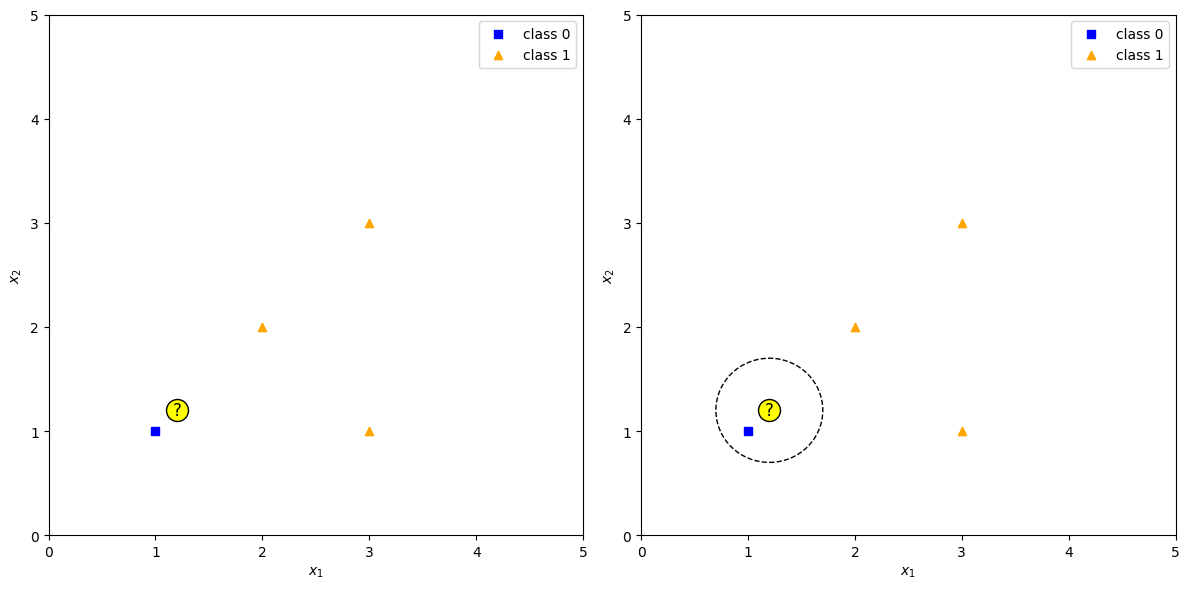

In [17]:
# Data for the first plot
x1 = np.array([1, 2, 3, 2, 3])
y1 = np.array([1, 3, 1, 2, 3])

# Data for the second plot
x2_class0 = np.array([1])
y2_class0 = np.array([1])

x2_class1 = np.array([2, 3, 3])
y2_class1 = np.array([2, 3, 1])

# Query point
query_point = np.array([1.2, 1.2])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First plot
ax[0].scatter(x2_class0, y2_class0, color='blue', label='class 0', marker='s')
ax[0].scatter(x2_class1, y2_class1, color='orange', label='class 1', marker='^')
ax[0].scatter(query_point[0], query_point[1], color='yellow', edgecolor='black', s=250, marker='o')
ax[0].text(query_point[0], query_point[1], '?', ha='center', va='center', fontsize=12)
ax[0].set_xlim(0, 5)
ax[0].set_ylim(0, 5)
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].legend()

# Second plot
ax[1].scatter(x2_class0, y2_class0, color='blue', label='class 0', marker='s')
ax[1].scatter(x2_class1, y2_class1, color='orange', label='class 1', marker='^')
ax[1].scatter(query_point[0], query_point[1], color='yellow', edgecolor='black', s=250, marker='o')
ax[1].text(query_point[0], query_point[1], '?', ha='center', va='center', fontsize=12)
ax[1].set_xlim(0, 5)
ax[1].set_ylim(0, 5)
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].legend()

# Drawing a circle around the query point in the second plot
circle = plt.Circle((query_point[0], query_point[1]), 0.5, color='black', fill=False, linestyle='--')
ax[1].add_patch(circle)

plt.tight_layout()
plt.show()

# KNN

In [2]:
import numpy as np #working with numbers
import matplotlib.pyplot as plt #plots
import pandas as pd #reading data
import seaborn as sns #plots

In [20]:
url = "https://raw.githubusercontent.com/gacek7/KNN-python-workshop/main/salary_data.csv"
data = pd.read_csv(url)
data.head(5)

,Gender,Age,Salary,Purchase
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
data.describe()

,Age,Salary,Purchase
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


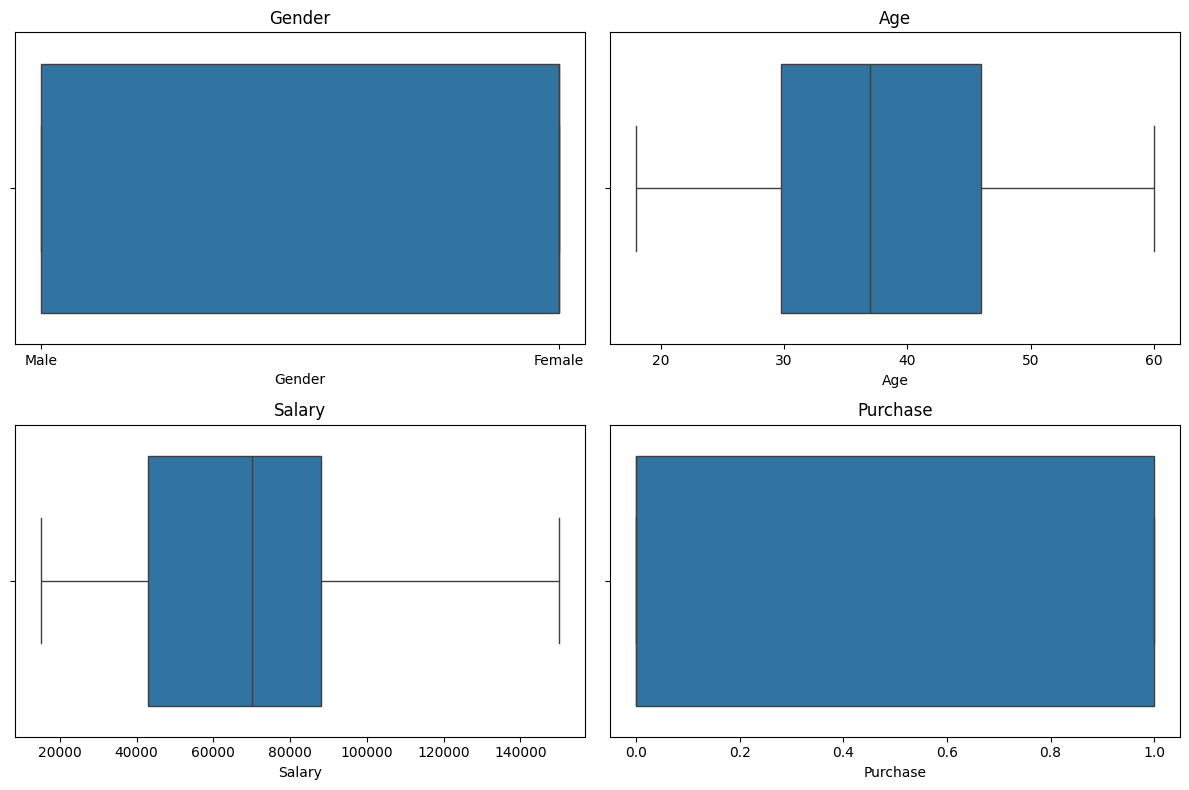

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the columns with non-zero dtype (assuming numeric)
columns_to_plot = data.columns[data.dtypes != '0']

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in the 2x2 grid
for i, col in enumerate(columns_to_plot):
    if i < len(axes):  # Check to avoid IndexError if there are more than 4 columns
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

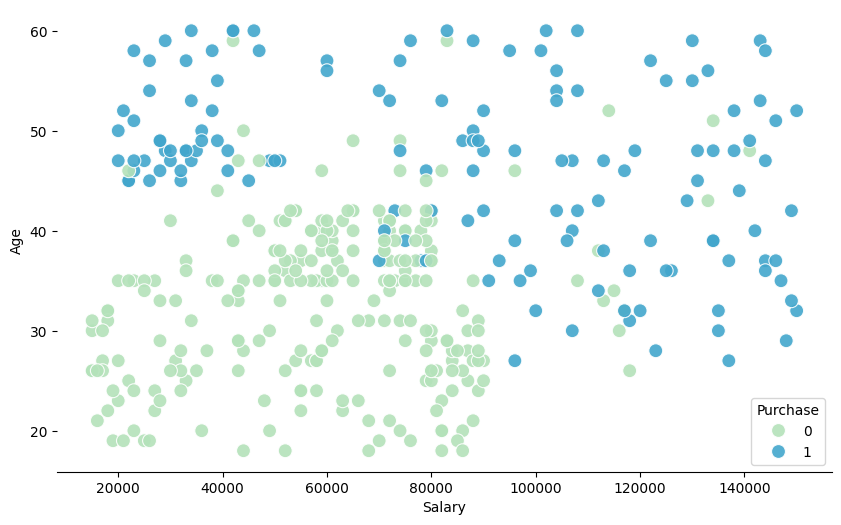

In [8]:
#create plot for 2 classes -> 0 = when someone did not purchase, 1 = when someone did purchase
plt.figure(figsize=(10,6))
sns.scatterplot(x='Salary', y='Age', data=data, hue=data['Purchase'], palette='GnBu', s=100, alpha=0.9)
sns.despine(left=True)

In [21]:
#map the data correctly to avoid 
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.head()

In [23]:
from sklearn.neighbors import KNeighborsClassifier #KNN algorithm
from sklearn.preprocessing import StandardScaler #Scalar needed to standarize data (if needed)
from math import sqrt #simple math function
from sklearn.metrics import accuracy_score,confusion_matrix #evaluation metrics to check our model
from sklearn.model_selection import train_test_split #simply diving data to train/test

In [25]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [33]:
#y = dependent variable and X = independent variables 
X[:5], y[:5]

(array([[    1,    19, 19000],
        [    1,    35, 20000],
        [    0,    26, 43000],
        [    0,    27, 57000],
        [    1,    19, 76000]], dtype=int64),
 array([0, 0, 0, 0, 0], dtype=int64))

In [34]:
#split data to train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
#checking the shape of train data - 320 observations, 3 independent variables
X_train.shape, y_train.shape

((320, 3), (320,))

In [36]:
#checking the shape of test data - 80 observations
X_test.shape, y_test.shape

((80, 3), (80,))

In [37]:
#Finding "k"
k = sqrt(data.shape[0])
k

20.0

In [54]:
## find k values by error method/elbow method
#Elbow method helps data scientists to select the optimal number of clusters for KNN clustering.
error = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i = knn.predict(X_test)
    error.append(np.mean(predict_i != y_test))

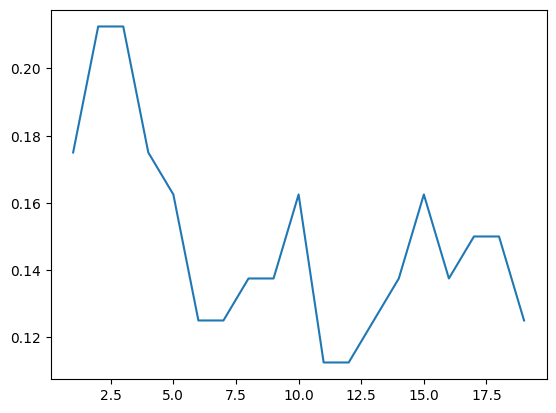

In [55]:
plt.plot(range(1,20), error)

In [61]:
#creating simple model after deciding that the best k is 11 and 12
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [62]:
#predict dependent variable 
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [63]:
#our model had 88.75% accuracy
accuracy_score(y_test,y_pred)

0.8875

In [65]:
#0 and 1 are two classes in your binary classification problem
#for 0s
#precision 0.9 -> Of all the instances predicted as class 0, 90% were actually class 0. This means the classifier has a high accuracy in predicting class 0.
#recall 0.95 -> Of all the actual instances of class 0, 95% were correctly identified by the classifier. This indicates that most of the true class 0 instances were detected.
#f1 score - average of precision and recall, 
#same cases for 1s
#The overall accuracy of the classifier is 89%, meaning that 89% of all predictions (both class 0 and class 1) were correct.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.84      0.73      0.78        22

    accuracy                           0.89        80
   macro avg       0.87      0.84      0.85        80
weighted avg       0.89      0.89      0.88        80



The KNN classifier performs very well on class 0, with high precision, recall. The performance on class 1 is lower, particularly in recall, suggesting that the classifier misses a notable portion of class 1 instances. Overall accuracy is high (89%), indicating that the classifier is generally effective.

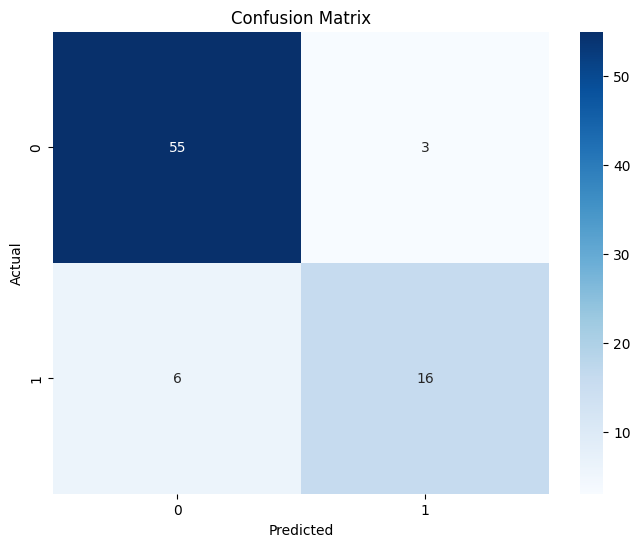

In [73]:
# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

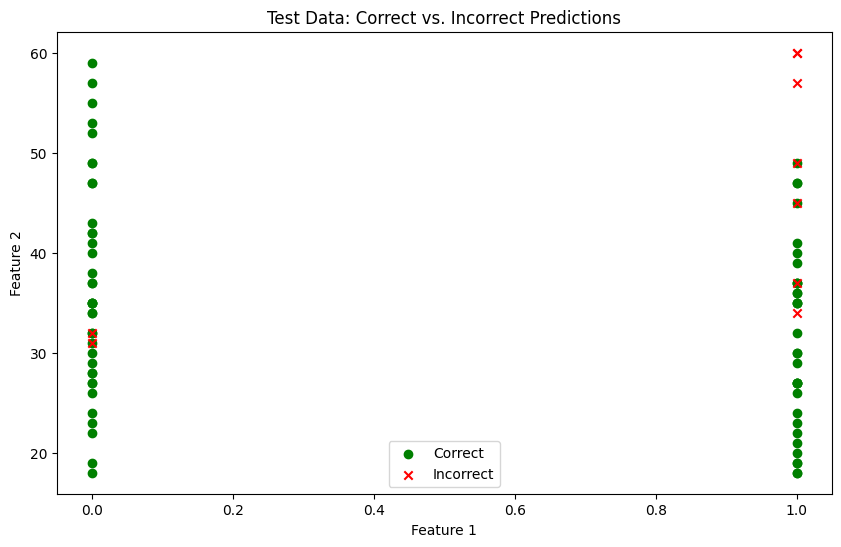

In [79]:
# Convert X_test to a DataFrame for plotting
X_test_df = pd.DataFrame(X_test)

# Scatter plot of test data (only for 2D feature space)
plt.figure(figsize=(10, 6))

# Plot correct predictions
correct = y_test == y_pred
plt.scatter(X_test_df[correct].iloc[:, 0], X_test_df[correct].iloc[:, 1], c='green', marker='o', label='Correct')

# Plot incorrect predictions
incorrect = y_test != y_pred
plt.scatter(X_test_df[incorrect].iloc[:, 0], X_test_df[incorrect].iloc[:, 1], c='red', marker='x', label='Incorrect')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Test Data: Correct vs. Incorrect Predictions')
plt.show()

In [89]:
y_test_series = pd.Series(y_test, name='Actual')
y_pred_series = pd.Series(y_pred, name='Predicted')

# Combine into a single DataFrame
results = pd.DataFrame({'Actual': y_test_series, 'Predicted': y_pred_series})

# Display the DataFrame
print(results.head())

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0


These visualizations help in understanding how well the model's predictions align with the actual class labels and can reveal any patterns or discrepancies in the predictions.

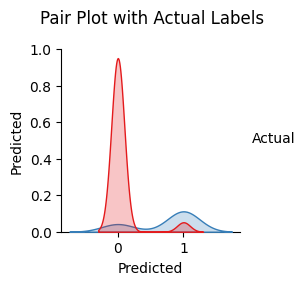

In [100]:

sns.pairplot(results_df, hue='Actual', markers=["o", "s"], palette="Set1", diag_kind="kde")
plt.suptitle('Pair Plot with Actual Labels', y = 1.1)
plt.show()

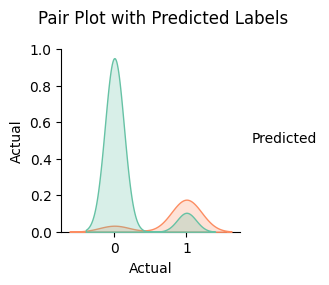

In [102]:

sns.pairplot(results_df, hue='Predicted', markers=["o", "s"], palette="Set2", diag_kind="kde")
plt.suptitle('Pair Plot with Predicted Labels', y=1.1)
plt.show()

In [108]:
results['Correct'] = results['Actual'] == results['Predicted']

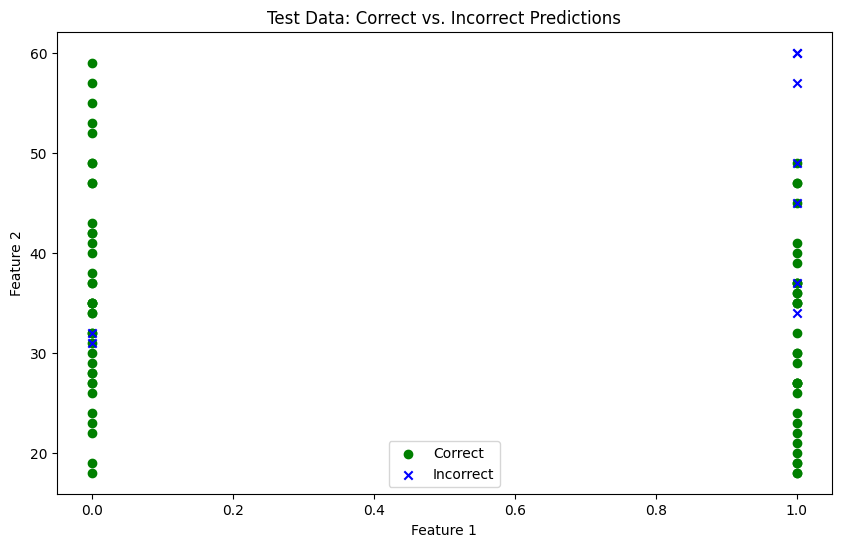

In [113]:
#Green Points: Represent data points where the model's prediction matches the actual label (correct predictions).
#Blue Points: Represent data points where the model's prediction does not match the actual label (incorrect predictions).
plt.figure(figsize=(10, 6))
plt.scatter(X_test_df[results['Correct']].iloc[:, 0], X_test_df[results['Correct']].iloc[:, 1], c='Green', marker='o', label='Correct')
plt.scatter(X_test_df[~results['Correct']].iloc[:, 0], X_test_df[~results['Correct']].iloc[:, 1], c='Blue', marker='x', label='Incorrect')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Test Data: Correct vs. Incorrect Predictions')
plt.show()